# Initiation au machine learning

Supports pour le cours d'initiation au machine learning proposé sur une semaine de formation.

## Algorithme des plus proches voisins

knn : k nearest neighbors

### Génération de données d'exemple

In [1]:
points_bleus = []
points_rouges = []

Dans un premier exemple les points au dessus de la diagonale sont bleus et ceux en dessous sont rouges.

Générer les coordonnées des différents points $(x,y)$, comprises entre 0 et 100.

[random — Generate pseudo-random numbers](https://docs.python.org/3/library/random.html)

    random.randint(a, b)
    Return a random integer N such that a <= N <= b. Alias for randrange(a, b+1).


In [2]:
import random
random.randint(0,100), random.randint(0,100), random.randint(0,100)

(6, 13, 52)

In [3]:
random.seed(42)
random.randint(0,100), random.randint(0,100), random.randint(0,100)

(81, 14, 3)

In [4]:
random.randint(0,100), random.randint(0,100), random.randint(0,100)

(94, 35, 31)

In [5]:
random.randint(0,100)

28

Génération de 10 points de chaque couleur:

In [6]:
random.seed(42)

n = 10  # Nombre de points par couleur

while len(points_bleus)!=n or len(points_rouges)!=n:
    x = random.randint(0,100)
    y = random.randint(0,100)
    if y >= x and len(points_bleus) < n:
        points_bleus.append((x,y))
    elif y < x and len(points_rouges) < n:
        points_rouges.append((x,y))

In [7]:
points_bleus

[(3, 94),
 (86, 94),
 (11, 27),
 (29, 64),
 (57, 75),
 (19, 27),
 (5, 93),
 (58, 68),
 (15, 48),
 (10, 70)]

In [8]:
points_rouges

[(81, 14),
 (35, 31),
 (28, 17),
 (94, 13),
 (69, 11),
 (75, 54),
 (4, 3),
 (77, 3),
 (71, 25),
 (91, 83)]

### Visualisation

[matplotlib scatter plot](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)

[Les couleurs sous matplotlib](https://matplotlib.org/stable/gallery/color/color_demo.html)

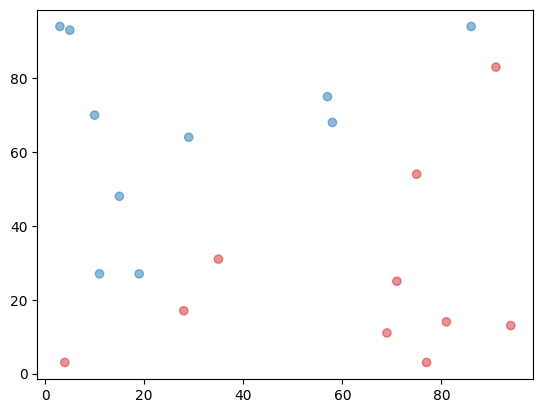

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# points_bleus puis points_rouges

abscisses = []
ordonnées = []
couleurs = []

for x,y in points_bleus:
    abscisses.append(x)
    ordonnées.append(y)
    couleurs.append('tab:blue')
for x,y in points_rouges:
    abscisses.append(x)
    ordonnées.append(y)
    couleurs.append('tab:red')

plt.scatter(abscisses, ordonnées, c=couleurs, alpha=0.5)
plt.show()

### Classification d'un nouveau point pris au hasard

exemple avec k = 3

In [10]:
# nouveau_point = (random.randint(0,100), random.randint(0,100))
nouveau_point = (11, 48)

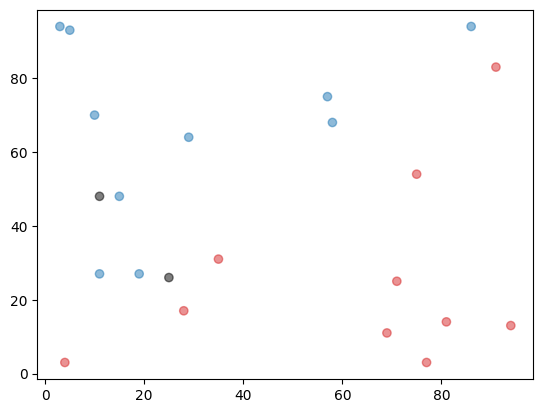

In [11]:
# Visualisation du jeu de données et des points que l'on cherche à classer (ici représentés en vert)
abscisses.append(11)
ordonnées.append(48)
abscisses.append(25)
ordonnées.append(26)
couleurs.append('black')
couleurs.append('black')
plt.scatter(abscisses, ordonnées, c=couleurs, alpha=0.5)
plt.show()

### Jeu de données initial et étiquettes associées

In [12]:
points = points_bleus + points_rouges
couleurs = ['bleu']*10 + ['rouge']*10

In [13]:
couleurs

['bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge']

### Etapes de l'algorithme

Distance entre deux points A et B du plan:

$$ L_2(A,B) = \sqrt{(x_A-x_B)^2+(y_A-y_B)^2}$$

[python library math](https://docs.python.org/3/library/math.html)
 
    math.dist(p, q)

    Return the Euclidean distance between two points p and q, each given as a sequence (or iterable) of coordinates. The two points must have the same dimension.

In [14]:
import math

origine = (0,0)
unité = (1,1)
math.dist(origine, unité)

1.4142135623730951

Calcul de l'ensemble des distances du nouveau point aux points du jeu de données initiales

In [15]:
distances = [math.dist(point, nouveau_point) for point in points]

In [16]:
# La ligne précédente est équivalente à :
distances = []
for point in points:
    distances.append(math.dist(point, nouveau_point))

[realpython list comprehension](https://realpython.com/list-comprehension-python/)

In [17]:
distances

[46.69047011971501,
 87.98295289429652,
 21.0,
 24.08318915758459,
 53.33854141237835,
 22.47220505424423,
 45.39823785126467,
 51.07837115648854,
 4.0,
 22.02271554554524,
 77.82030583337487,
 29.410882339705484,
 35.35533905932738,
 90.07774419910837,
 68.79680225126747,
 64.28063471995279,
 45.5411901469428,
 79.88116173416608,
 64.25729530566937,
 87.32124598286491]

In [18]:
# Liste des distances associées aux couleurs de points
[(d, c) for (d,c) in zip(distances, couleurs)]

[(46.69047011971501, 'bleu'),
 (87.98295289429652, 'bleu'),
 (21.0, 'bleu'),
 (24.08318915758459, 'bleu'),
 (53.33854141237835, 'bleu'),
 (22.47220505424423, 'bleu'),
 (45.39823785126467, 'bleu'),
 (51.07837115648854, 'bleu'),
 (4.0, 'bleu'),
 (22.02271554554524, 'bleu'),
 (77.82030583337487, 'rouge'),
 (29.410882339705484, 'rouge'),
 (35.35533905932738, 'rouge'),
 (90.07774419910837, 'rouge'),
 (68.79680225126747, 'rouge'),
 (64.28063471995279, 'rouge'),
 (45.5411901469428, 'rouge'),
 (79.88116173416608, 'rouge'),
 (64.25729530566937, 'rouge'),
 (87.32124598286491, 'rouge')]

In [19]:
distances_classées = sorted([(d, c) for (d,c) in zip(distances, couleurs)])
distances_classées

[(4.0, 'bleu'),
 (21.0, 'bleu'),
 (22.02271554554524, 'bleu'),
 (22.47220505424423, 'bleu'),
 (24.08318915758459, 'bleu'),
 (29.410882339705484, 'rouge'),
 (35.35533905932738, 'rouge'),
 (45.39823785126467, 'bleu'),
 (45.5411901469428, 'rouge'),
 (46.69047011971501, 'bleu'),
 (51.07837115648854, 'bleu'),
 (53.33854141237835, 'bleu'),
 (64.25729530566937, 'rouge'),
 (64.28063471995279, 'rouge'),
 (68.79680225126747, 'rouge'),
 (77.82030583337487, 'rouge'),
 (79.88116173416608, 'rouge'),
 (87.32124598286491, 'rouge'),
 (87.98295289429652, 'bleu'),
 (90.07774419910837, 'rouge')]

In [20]:
k=3
distances_classées[:k]

[(4.0, 'bleu'), (21.0, 'bleu'), (22.02271554554524, 'bleu')]

Cas d'une classification erronée (dûe au manque de points dans le jeu de données initial)

In [21]:
nouveau_point = (25, 26)  # devrait être classé en bleu
distances = [math.dist(point, nouveau_point) for point in points]
plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, couleurs)])[:k]
plus_petites_distances

[(6.082762530298219, 'bleu'),
 (9.486832980505138, 'rouge'),
 (11.180339887498949, 'rouge')]

Extraction de la couleur la plus fréquente:

In [22]:
from collections import Counter
Counter([couleur for _, couleur in plus_petites_distances]).most_common(1)[0][0]

'rouge'

### Fonction kNN

In [23]:
from collections import Counter

def kNN(X, y, new_x, k=3):
    """
    args:
        X: jeu de données initiales
        y: classes associées aux éléments de X 
        new_x: nouveau point que l'on souhaite classer
        k: nombre de voisins pris dans l'évaluation

    return:
        La classe de `y` la plus fréquente
    """
    distances = [math.dist(new_x, x) for x in X]
    plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, y)])[:k]
    counter = Counter([classe for _, classe in plus_petites_distances])
    
    return counter.most_common(1)[0][0]

In [24]:
kNN(points, couleurs, (25, 26))  # devrait être classé en bleu

'rouge'

In [25]:
kNN(points, couleurs, (11, 48))  # devrait être classé en bleu

'bleu'

### Références

[StatQuest: K-nearest neighbors, Clearly Explained](https://www.youtube.com/watch?v=HVXime0nQeI)

## Normalisation

### Normalisation: motivation

Création d'un jeu de données d'exemple

In [26]:
from collections import namedtuple

Point = namedtuple('Point', 'x1 x2')

In [27]:
p = Point(1, 2)
p

Point(x1=1, x2=2)

In [28]:
p.x1

1

In [29]:
p[0]

1

In [30]:
# abscisses
list(range(0,12,2))

[0, 2, 4, 6, 8, 10]

In [31]:
points_bleus = [Point(x1, 0) for x1 in range(2,12,2)]
points_rouges = [Point(x1, 1) for x1 in range(0,10,2)]

points = points_bleus + points_rouges
couleurs = ['bleu']*len(points_bleus) + ['rouge']*len(points_rouges)

In [32]:
points

[Point(x1=2, x2=0),
 Point(x1=4, x2=0),
 Point(x1=6, x2=0),
 Point(x1=8, x2=0),
 Point(x1=10, x2=0),
 Point(x1=0, x2=1),
 Point(x1=2, x2=1),
 Point(x1=4, x2=1),
 Point(x1=6, x2=1),
 Point(x1=8, x2=1)]

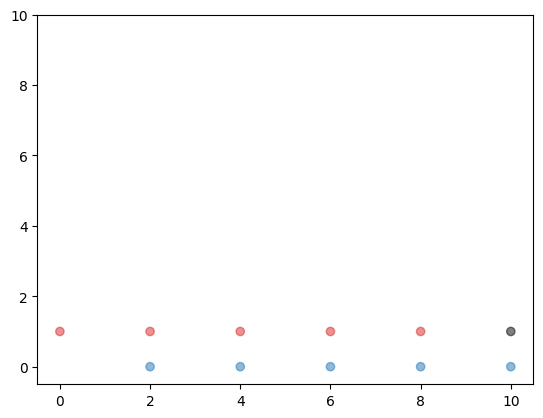

In [33]:
import matplotlib.pyplot as plt

abscisses  = [point.x1 for point in points]
ordonnées = [point.x2 for point in points]

point_inconnu = Point(10, 1)

colors = []
for c in couleurs:
    if c == 'bleu':
        colors.append('tab:blue')
    else:
        colors.append('tab:red')

# point_inconnu
abscisses.append(point_inconnu.x1)
ordonnées.append(point_inconnu.x2)
colors.append('black')

plt.ylim(-0.5, 10)
plt.scatter(abscisses, ordonnées, c=colors, alpha=0.5)
plt.show()

`(10, 1)` serait rouge mais classé bleu pour  k=1


In [34]:
kNN(points, couleurs, point_inconnu, k=1)

'bleu'

In [35]:
kNN(points, couleurs, point_inconnu, k=3)

'bleu'

### Moyenne, variance et écart type

Pour l'ensemble de n valeurs `x = [x_1, ..., x_n ]`, on définit:
- la moyenne (mean):
$$\overline{x} = \mu = \frac{1}{n} \sum_{i=1}^{n}x_{i}$$
- La variance qui est une mesure de la dispersion de l'échantillon, c'est la moyenne des carrés des distances à la moyenne de l'échantillon.
$$Var(x)=\sigma^2=\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\mu)^2$$
- l'écart type (standard deviation) 
$$\sigma=\sqrt{Var(x)}=\sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\overline{x})^2}$$

### Normalisation standard

Pour l'ensemble de n valeurs $x = [x_1, ..., x_n ]$, on définit:
$$z_{i} = \frac{x_{i}-\mu}{\sigma}$$

On utilise `z`à la place de `x`

On fait le même procédé sur chacun des axes

In [36]:
points

[Point(x1=2, x2=0),
 Point(x1=4, x2=0),
 Point(x1=6, x2=0),
 Point(x1=8, x2=0),
 Point(x1=10, x2=0),
 Point(x1=0, x2=1),
 Point(x1=2, x2=1),
 Point(x1=4, x2=1),
 Point(x1=6, x2=1),
 Point(x1=8, x2=1)]

In [37]:
couleurs

['bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge']

In [38]:
x1 = [point.x1 for point in points]
x1

[2, 4, 6, 8, 10, 0, 2, 4, 6, 8]

[statistics — Mathematical statistics functions](https://docs.python.org/3/library/statistics.html)

In [39]:
from statistics import mean, stdev, pstdev
# Moyenne
mean(x1)

5

In [40]:
# Ecart type
pstdev(x1)

3.0

Remarque: `stdev` sert à évaluer l'écart type d'une population à partir d'un échantillon, ne donne pas le même résultat que la formule proposée qui, comme `pstdev`donne directement l'écart type d'une population.

In [41]:
stdev(x1)

3.1622776601683795

In [42]:
math.sqrt((1/len(x1))*sum([(x1_i - mean(x1))**2 for x1_i in x1]))

3.0

In [43]:
z1 = [(x1_i - mean(x1))/pstdev(x1) for x1_i in x1]
z1

[-1.0,
 -0.3333333333333333,
 0.3333333333333333,
 1.0,
 1.6666666666666667,
 -1.6666666666666667,
 -1.0,
 -0.3333333333333333,
 0.3333333333333333,
 1.0]

In [44]:
mean(z1)

0.0

In [45]:
pstdev(z1)

1.0

In [46]:
x2 = [point.x2 for point in points]
z2 = [(x2_i - mean(x2))/pstdev(x2) for x2_i in x2]
z2

[-1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [47]:
mean(z2), pstdev(z2)

(0.0, 1.0)

In [48]:
point_inconnu

Point(x1=10, x2=1)

In [49]:
# valeurs de moyennes et d'écarts types reprises pour la modification des coordonnées du point inconnu
z1_inconnu = (point_inconnu.x1 - mean(x1))/pstdev(x1)
z2_inconnu = (point_inconnu.x2 - mean(x2))/pstdev(x2)

# Pour l'affichage
z1.append(z1_inconnu)
z2.append(z2_inconnu)

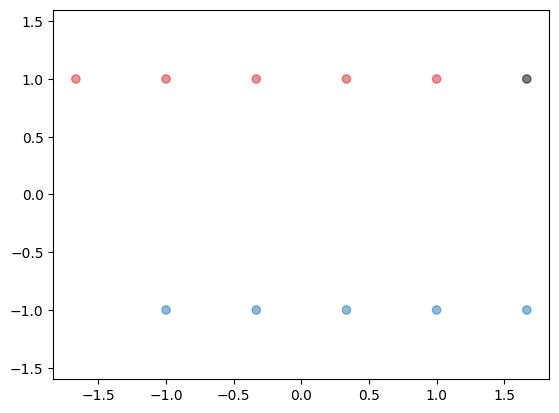

In [50]:
colors = []
for c in couleurs:
    if c == 'bleu':
        colors.append('tab:blue')
    else:
        colors.append('tab:red')
colors.append('black')

plt.ylim(-1.6, 1.6)
plt.scatter(z1, z2, c=colors, alpha=0.5)
plt.show()

### kNN sur données normalisées

In [51]:
z1.pop()
z2.pop()
list(zip(z1, z2))

[(-1.0, -1.0),
 (-0.3333333333333333, -1.0),
 (0.3333333333333333, -1.0),
 (1.0, -1.0),
 (1.6666666666666667, -1.0),
 (-1.6666666666666667, 1.0),
 (-1.0, 1.0),
 (-0.3333333333333333, 1.0),
 (0.3333333333333333, 1.0),
 (1.0, 1.0)]

In [52]:
X_normalisé = list(zip(z1, z2))

In [53]:
point_inconnu_normalisé = Point(z1_inconnu, z2_inconnu)
point_inconnu_normalisé

Point(x1=1.6666666666666667, x2=1.0)

In [54]:
kNN(X_normalisé, couleurs, point_inconnu_normalisé, k=1)

'rouge'

In [55]:
kNN(X_normalisé, couleurs, point_inconnu_normalisé, k=3)

'rouge'

In [56]:
kNN(X_normalisé, couleurs, point_inconnu_normalisé, k=2)

'rouge'

## Parallèle avec scikit learn

Nous allons coder deux classes au fonctionnement similaire à celles de scikit learn: StandardScaler pour la normalisation et NearestNeighbors pour le knn.

> Ne pas utiliser `sklearn` pour l'instant.

### Nomenclature

In [57]:
import pandas as pd
from collections import namedtuple

Point = namedtuple('Point', 'x_1 x_2')

points_bleus = [Point(x_1, 0) for x_1 in range(2,12,2)]
points_rouges = [Point(x_1, 1) for x_1 in range(0,10,2)]

points = points_bleus + points_rouges
couleurs = ['bleu']*len(points_bleus) + ['rouge']*len(points_rouges)

data = pd.DataFrame({'abscisse' : [point.x_1 for point in points],
                     'ordonnée' : [point.x_2 for point in points],
                     'couleur' : couleurs})
data

# observation // individu
# X : caractéristiques (features), ici [abscisse, ordonnée], [x_1, x_2]
# y : classe, cible ici couleur

,abscisse,ordonnée,couleur
0,2,0,bleu
1,4,0,bleu
2,6,0,bleu
3,8,0,bleu
4,10,0,bleu
5,0,1,rouge
6,2,1,rouge
7,4,1,rouge
8,6,1,rouge
9,8,1,rouge


In [58]:
# Scikit-learn travaille avec des valeurs numériques
# Notre algorithme quant à lui autorise des valeurs textuelles pour y
[c=='bleu' for c in couleurs]

[True, True, True, True, True, False, False, False, False, False]

In [59]:
data = pd.DataFrame({'x_1' : [point.x_1 for point in points],
                     'x_2' : [point.x_2 for point in points],
                     'y' : [int(c=='bleu') for c in couleurs]})
data

,x_1,x_2,y
0,2,0,1
1,4,0,1
2,6,0,1
3,8,0,1
4,10,0,1
5,0,1,0
6,2,1,0
7,4,1,0
8,6,1,0
9,8,1,0


In [60]:
# X
X = pd.DataFrame({'x_1' : [point.x_1 for point in points],
                  'x_2' : [point.x_2 for point in points]})
print(X.to_string(index=False))

 x_1  x_2
   2    0
   4    0
   6    0
   8    0
  10    0
   0    1
   2    1
   4    1
   6    1
   8    1


$$
X=
\begin{bmatrix}
2 & 0\\ 
4 & 0\\ 
6 & 0\\ 
\vdots & \vdots \\ 
8 & 1\\ 
\end{bmatrix}
$$

In [61]:
# y
y = pd.DataFrame({'y' : [int(c=='bleu') for c in couleurs]})
print(y.to_string(index=False))

 y
 1
 1
 1
 1
 1
 0
 0
 0
 0
 0


$$
y=
\begin{bmatrix}
1\\ 
1\\ 
1\\ 
\vdots \\ 
0\\ 
\end{bmatrix}
$$

### Standardisation

Ne pas utiliser `sklearn` pour l'instant. Par contre, on va s'inspirer de la signature des fonctions de [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [62]:
class Scaler():
    def __init__(self):
        pass
    def fit(self, X):
        """Compute the mean and std to be used for later scaling."""
        pass
    def transform(self, X):
        """Perform standardization by centering and scaling."""
        pass

In [63]:
points

[Point(x_1=2, x_2=0),
 Point(x_1=4, x_2=0),
 Point(x_1=6, x_2=0),
 Point(x_1=8, x_2=0),
 Point(x_1=10, x_2=0),
 Point(x_1=0, x_2=1),
 Point(x_1=2, x_2=1),
 Point(x_1=4, x_2=1),
 Point(x_1=6, x_2=1),
 Point(x_1=8, x_2=1)]

In [64]:
import numpy as np
X = np.array(points, dtype=float)
X

array([[ 2.,  0.],
       [ 4.,  0.],
       [ 6.,  0.],
       [ 8.,  0.],
       [10.,  0.],
       [ 0.,  1.],
       [ 2.,  1.],
       [ 4.,  1.],
       [ 6.,  1.],
       [ 8.,  1.]])

In [65]:
X.shape

(10, 2)

In [66]:
for j in range(X.shape[1]):
    print(f'Vecteur colonne {j}')
    print(np.atleast_2d(X[:, j]).T)
    print('\n')

Vecteur colonne 0
[[ 2.]
 [ 4.]
 [ 6.]
 [ 8.]
 [10.]
 [ 0.]
 [ 2.]
 [ 4.]
 [ 6.]
 [ 8.]]


Vecteur colonne 1
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]




In [67]:
from statistics import mean, stdev
_mean = []
_stdev = []
for j in range(X.shape[1]):
    _mean.append(mean(X[:, j]))
    _stdev.append(stdev(X[:, j]))
_mean

[5.0, 0.5]

In [68]:
_stdev

[3.1622776601683795, 0.5270462766947299]

Remarque: stdev plutôt que pstdev, car on peu considérer que l'on évalue l'écart type d'une population bien plus grande. En fait, ici les deux sont équivalents.

In [69]:
X_normalisé = np.zeros_like(X)
X_normalisé

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [70]:
for j in range(X.shape[1]):
    X_normalisé[:, j] = (X[:, j] - _mean[j])/_stdev[j]

In [71]:
X_normalisé

array([[-0.9486833 , -0.9486833 ],
       [-0.31622777, -0.9486833 ],
       [ 0.31622777, -0.9486833 ],
       [ 0.9486833 , -0.9486833 ],
       [ 1.58113883, -0.9486833 ],
       [-1.58113883,  0.9486833 ],
       [-0.9486833 ,  0.9486833 ],
       [-0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.9486833 ,  0.9486833 ]])

In [72]:
class Scaler():
    def __init__(self):
        self._mean = []
        self._stdev = []
    def fit(self, X):
        """Compute the mean and std to be used for later scaling."""
        X = np.array(X, dtype=float)
        self._mean.clear()
        self._stdev.clear()
        for axe in range(X.shape[1]):
            self._mean.append(mean(X[:, axe]))
            self._stdev.append(stdev(X[:, axe]))
    def transform(self, X):
        """Perform standardization by centering and scaling."""
        X = np.array(X, dtype=float)
        X_normalisé = np.zeros_like(X)        
        for j in range(X.shape[1]):
            X_normalisé[:, j] = (X[:, j] - self._mean[j])/self._stdev[j]
        return X_normalisé

In [73]:
scaler = Scaler()
scaler.fit(points)
points_normalisés = scaler.transform(points)
points_normalisés

array([[-0.9486833 , -0.9486833 ],
       [-0.31622777, -0.9486833 ],
       [ 0.31622777, -0.9486833 ],
       [ 0.9486833 , -0.9486833 ],
       [ 1.58113883, -0.9486833 ],
       [-1.58113883,  0.9486833 ],
       [-0.9486833 ,  0.9486833 ],
       [-0.31622777,  0.9486833 ],
       [ 0.31622777,  0.9486833 ],
       [ 0.9486833 ,  0.9486833 ]])

In [74]:
point_inconnu = Point(10, 1)
scaler.transform([point_inconnu])

array([[1.58113883, 0.9486833 ]])

In [75]:
# exemple avec X qui a plus de caractéristiques (i.e. colonnes):

In [76]:
X = np.random.rand(4,5)*100
X

array([[99.16509822, 97.45125919, 57.47794824,  5.1584493 , 20.85041375],
       [97.67015589, 16.75986041, 58.30083038, 28.86723826, 68.36460541],
       [68.89146911, 11.91587916, 25.22518011, 37.02522727, 26.44098833],
       [38.30621285, 18.78047708, 54.40490459, 46.88446688, 92.44860774]])

In [77]:
scaler = Scaler()
scaler.fit(X)
scaler.transform(X)

array([[ 0.80580028,  1.49627884,  0.54454226, -1.36570536, -0.90917427],
       [ 0.75378007, -0.4757593 ,  0.59649079, -0.03461829,  0.47647625],
       [-0.24764541, -0.59414262, -1.49157414,  0.42339724, -0.74613703],
       [-1.31193493, -0.42637692,  0.35054109,  0.97692641,  1.17883505]])

In [78]:
mean(scaler.transform(X)[:,1])

-5.551115123125783e-17

### Classification

Ne pas utiliser `sklearn` pour l'instant. Par contre, on va s'inspirer de la signature des fonctions de 
[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

In [79]:
class knnClassifier():
    def __init__(self, k=3):
        pass
        
    def fit(self, X, y):
        """Fit the nearest neighbors estimator from the training dataset."""
        pass
    
    def predict(self, X):
        """Predict the class labels for the provided data."""
        pass

In [80]:
class knnClassifier():
    def __init__(self, k=3):
        self.k = k
        self._fit_X = None
        self._fit_y = None
        
    def fit(self, X, y):
        """Fit the nearest neighbors estimator from the training dataset."""
        self._fit_X = np.array(X, dtype=float)
        self._fit_y = y
    
    def predict(self, X):
        """Predict the class labels for the provided data."""
        def kNN(new_x):
            """
            args:
                X: jeu de données initiales
                y: classes associées aux éléments de X 
                new_x: nouveau point que l'on souhaite classer
                k: nombre de voisins pris dans l'évaluation
        
            return:
                La classe de `y` la plus fréquente
            """
            distances = [math.dist(new_x, x) for x in self._fit_X]
            plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, self._fit_y)])[:self.k]
            counter = Counter([classe for _, classe in plus_petites_distances])
            
            return counter.most_common(1)[0][0]
            
        return [kNN(x) for x in X]

In [81]:
points_inconnus = [Point(0, 0), Point(10, 1)]

In [82]:
# Sans normalisation
classifier = knnClassifier()
classifier.fit(points, couleurs)
classifier.predict(points_inconnus)

['rouge', 'bleu']

In [83]:
# Avec normalisation
scaler = Scaler()
scaler.fit(points)
points_normalisés = scaler.transform(points)
points_inconnus_normalisés = scaler.transform(points_inconnus)

classifier = knnClassifier()
classifier.fit(points_normalisés, couleurs)
classifier.predict(points_inconnus_normalisés)

['bleu', 'rouge']

## Application à un vrai jeu de données

Peut-on prédire si un client va acheter une assurance ou pas?

[dataset Caravan](https://islp.readthedocs.io/en/latest/datasets/Caravan.html)

[instructions d'installations](https://islp.readthedocs.io/en/latest/installation.html)

Les données contiennent 5 822 enregistrements de clients réels. Chaque enregistrement se compose de 86 variables, contenant des données sociodémographiques (variables 1 à 43) et la souscription ou la possession de certains produits (variables 44 à 86). Les données sociodémographiques sont dérivées des codes postaux. Tous les clients vivant dans des zones ayant le même code postal ont les mêmes attributs sociodémographiques. La variable 86 (Achat) indique si le client a souscrit une police d'assurance caravane. De plus amples informations sur les variables individuelles peuvent être obtenues sur [http://www.liacs.nl/~putten/library/cc2000/data.html](http://www.liacs.nl/~putten/library/cc2000/data.html)

### Séparation du jeu de données en données d'entraînement et données de test

In [84]:
from ISLP import load_data
caravan = load_data('Caravan')
caravan.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [85]:
caravan.shape

(5822, 86)

Séparation du jeu de données en données d'entraînement (80%) et données de test (20%) sans `sklearn`

In [86]:
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [87]:
caravan.dtypes

MOSTYPE      int64
MAANTHUI     int64
MGEMOMV      int64
MGEMLEEF     int64
MOSHOOFD     int64
             ...  
APLEZIER     int64
AFIETS       int64
AINBOED      int64
ABYSTAND     int64
Purchase    object
Length: 86, dtype: object

In [88]:
caravan.Purchase.map(lambda x: int(x=='Yes'))

0       0
1       0
2       0
3       0
4       0
       ..
5817    0
5818    0
5819    1
5820    0
5821    0
Name: Purchase, Length: 5822, dtype: int64

In [89]:
caravan.Purchase = caravan.Purchase.map(lambda x: int(x=='Yes'))

In [90]:
caravan.to_numpy()

array([[33,  1,  3, ...,  0,  0,  0],
       [37,  1,  2, ...,  0,  0,  0],
       [37,  1,  2, ...,  0,  0,  0],
       ...,
       [33,  1,  3, ...,  0,  0,  1],
       [34,  1,  3, ...,  0,  0,  0],
       [33,  1,  3, ...,  0,  0,  0]])

In [91]:
X = caravan.to_numpy()[:,:-1]
X.shape

(5822, 85)

In [92]:
y = caravan.to_numpy()[:,-1]
y.shape

(5822,)

In [93]:
X

array([[33,  1,  3, ...,  0,  0,  0],
       [37,  1,  2, ...,  0,  0,  0],
       [37,  1,  2, ...,  0,  0,  0],
       ...,
       [33,  1,  3, ...,  0,  0,  0],
       [34,  1,  3, ...,  0,  0,  0],
       [33,  1,  3, ...,  0,  0,  0]])

In [94]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [95]:
# Sans utilisation de numpy X_, y_
X_ = X.tolist()
type(X_), len(X_), len(X_[0])

(list, 5822, 85)

In [96]:
y_ = y.tolist()
type(y_), len(y_)

(list, 5822)

#### Solution avec random.shuffle(x)

Solution avec [random.shuffle(x)](https://docs.python.org/3/library/random.html)

In [97]:
indices = list(range(10))
indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [98]:
import random

In [99]:
random.shuffle(indices)
indices

[2, 9, 7, 1, 6, 0, 8, 3, 5, 4]

In [100]:
import math
séparateur = math.floor(len(indices)*20/100)
séparateur

2

In [101]:
indices[:séparateur]

[2, 9]

In [102]:
indices[séparateur:]

[7, 1, 6, 0, 8, 3, 5, 4]

#### Solution avec random.sample()

Solution avec [random.sample()](https://docs.python.org/3/library/random.html)

In [103]:
random.seed(0)

In [104]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [105]:
random.sample(range(10), k=3)

[6, 9, 0]

In [106]:
nombre_de_ligne = X.shape[0]
random.seed(3141592)
# 20%
taille_de_l_échantillon = math.floor(nombre_de_ligne*20/100)
échantillon = random.sample(range(nombre_de_ligne),
                            k=taille_de_l_échantillon)
len(échantillon)

1164

In [107]:
len(set(échantillon))

1164

In [108]:
X_test = X[échantillon, :]
X_test.shape

(1164, 85)

In [109]:
y_test = y[échantillon]
y_test.shape

(1164,)

In [110]:
# Exemple pour récupérer les indices restants
échantillon_test = random.sample(range(10), k=3)
set(échantillon_test)

{1, 7, 8}

In [111]:
indices = set(range(10))
indices

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [112]:
indices.difference_update(échantillon_test)
indices

{0, 2, 3, 4, 5, 6, 9}

In [113]:
# Pour notre jeu de données
indices_restants = set(range(nombre_de_ligne))
indices_restants.difference_update(échantillon)
indices_restants = list(indices_restants)
len(indices_restants)

4658

In [114]:
X_train = X[indices_restants, :]
X_train.shape

(4658, 85)

In [115]:
y_train = y[indices_restants]
y_train.shape

(4658,)

Vérifier que la distribution des valeurs dans `y_train` et `y_test` corresponde à celle de `y`. Est-on sûr que ce soit le cas à chaque fois?

In [116]:
y_train.sum()/len(y_train)

0.05775010734220696

In [117]:
y_test.sum()/len(y_test)

0.06786941580756013

### Notre implémentation des algorithmes

Test de nos objets sur ce jeu de données (si la généralisation à un nombre arbitraire de colonnes a été faite)

In [118]:
import numpy as np
from collections import Counter
from statistics import mean, stdev

In [119]:
class Scaler():
    def __init__(self):
        self._mean = []
        self._stdev = []
    def fit(self, X):
        """Compute the mean and std to be used for later scaling."""
        X = np.array(X, dtype=float)
        self._mean.clear()
        self._stdev.clear()
        for axe in range(X.shape[1]):
            self._mean.append(mean(X[:, axe]))
            self._stdev.append(stdev(X[:, axe]))
    def transform(self, X):
        """Perform standardization by centering and scaling."""
        X = np.array(X, dtype=float)
        X_normalisé = np.zeros_like(X)        
        for j in range(X.shape[1]):
            X_normalisé[:, j] = (X[:, j] - self._mean[j])/self._stdev[j]
        return X_normalisé

In [120]:
class knnClassifier():
    def __init__(self, k=3):
        self.k = k
        self._fit_X = None
        self._fit_y = None
        
    def fit(self, X, y):
        """Fit the nearest neighbors estimator from the training dataset."""
        self._fit_X = np.array(X, dtype=float)
        self._fit_y = y
    
    def predict(self, X):
        """Predict the class labels for the provided data."""
        def kNN(new_x):
            """
            args:
                X: jeu de données initiales
                y: classes associées aux éléments de X 
                new_x: nouveau point que l'on souhaite classer
                k: nombre de voisins pris dans l'évaluation
        
            return:
                La classe de `y` la plus fréquente
            """
            distances = [math.dist(new_x, x) for x in self._fit_X]
            plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, self._fit_y)])[:self.k]
            counter = Counter([classe for _, classe in plus_petites_distances])
            
            return counter.most_common(1)[0][0]
            
        return [kNN(x) for x in X]

#### Sans normalisation

In [121]:
# sans normalisation

# apprentissage
classifier = knnClassifier()
classifier.fit(X_train, y_train)

# inférence
y_test_predicted = classifier.predict(X_test)


Quel est le taux d'erreur?

In [122]:
sum(y_test_predicted != y_test)/len(y_test)

0.0859106529209622

#### Avec normalisation

In [123]:
# avec normalisation

scaler = Scaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

# apprentissage
classifier = knnClassifier()
classifier.fit(X_train_normalized, y_train)

# inférence
X_test_normalized = scaler.transform(X_test)
y_test_predicted = classifier.predict(X_test_normalized)


In [124]:
sum(y_test_predicted != y_test)/len(y_test)

0.08247422680412371

Différence légère sur le taux d'erreur.

#### Quelle mesure pour la pertinence de notre algorithme?

In [125]:
caravan.Purchase.value_counts()

0    5474
1     348
Name: Purchase, dtype: int64

Le taux d'erreur KNN sur les 1 000 observations de test est d'un peu moins de 10%. À première vue, cela peut paraître plutôt bon. Cependant, étant donné qu'un peu plus de 6 % des clients ont souscrit une assurance, nous pourrions réduire le taux d'erreur à près de 6 % en prédisant toujours Non, quelles que soient les valeurs des prédicteurs ! C'est ce qu'on appelle l'hypothèse nulle.}

Supposons qu’il y ait un coût non négligeable à tenter de vendre une assurance à un individu donné. Par exemple, un vendeur doit peut-être rendre visite à chaque client potentiel. Si l’entreprise tente de vendre de l’assurance à une sélection aléatoire de clients, le taux de réussite ne sera que de 6 %, ce qui pourrait être bien trop faible compte tenu des coûts impliqués. Au lieu de cela, l’entreprise aimerait essayer de vendre de l’assurance uniquement aux clients susceptibles de l’acheter. Le taux d’erreur global n’a donc aucun intérêt. Au lieu de cela, la fraction d’individus dont on prévoit correctement qu’ils souscriront une assurance est intéressante.

Comment mesurer ce taux?

In [126]:
from ISLP import confusion_table

In [127]:
confusion_table(y_test_predicted, y_test)

Truth,0,1
Predicted,,
0,1063,74
1,22,5


In [128]:
5/(22+5)

0.18518518518518517

In [129]:
# Clients choisis au hasard
(74+5)/(74+5+1063+22)

0.06786941580756013

In [130]:
assert len(y_test) == 74+5+1063+22

### Avec scikit-learn

#### k=1 sans normalisation

In [131]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [132]:
# avec un seul voisin: k=1, sans normalisation

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X,
                            y,
                            test_size=1164,
                            random_state=0)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test)
confusion_table(knn1_pred, y_test)

Truth,0,1
Predicted,,
0,1021,69
1,66,8


In [133]:
8/(66+8)

0.10810810810810811

#### k=1 avec normalisation

In [134]:
# avec un seul voisin: k=1

scaler_sk = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler_sk.fit(X)
X_std = scaler_sk.transform(X)

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X_std,
                            y,
                            test_size=1164,
                            random_state=0)
knn1 = KNeighborsClassifier(n_neighbors=1)
X_test_std = scaler_sk.transform(X_test)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test_std)
np.mean(y_test != knn1_pred), np.mean(y_test)
confusion_table(knn1_pred, y_test)

Truth,0,1
Predicted,,
0,1071,73
1,16,4


In [135]:
4/(16+4)

0.2

#### k=3 sans normalisation

In [136]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X,
                            y,
                            test_size=1164,
                            random_state=0)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn3_pred), np.mean(y_test)
confusion_table(knn3_pred, y_test)

Truth,0,1
Predicted,,
0,1072,77
1,15,0


Bof, bof...

#### k=3 avec normalisation

In [137]:
scaler_sk = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)
scaler_sk.fit(X)
X_std = scaler_sk.transform(X)

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X_std,
                            y,
                            test_size=1164,
                            random_state=0)
knn3 = KNeighborsClassifier(n_neighbors=3)
X_test_std = scaler_sk.transform(X_test)
knn3_pred = knn3.fit(X_train, y_train).predict(X_test_std)
np.mean(y_test != knn3_pred), np.mean(y_test)
confusion_table(knn3_pred, y_test)

Truth,0,1
Predicted,,
0,1078,74
1,9,3


In [138]:
3/(9+3)

0.25

Meilleur score, mais peu d'éléments choisis.

### Références

[Introduction to Statistical Learning with applications in Python: Logistic Regression, LDA, QDA, and KNN](https://islp.readthedocs.io/en/latest/labs/Ch04-classification-lab.html)